In [1]:
import os

exp_root_path = os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/05_"

dataset_paths = {
    "methane": None,
    "QM9": os.environ["DATA"] + "/00_datasets/DFT/QM9/QM9.smi",
    "ChEMBL_filtered": os.environ["DATA"] + "/00_datasets/ChEMBL25/ChEMBL_QED_below_QM9.smi"
}

datasets_values = dataset_paths.keys()
xi_values = [0, 0.01]
merit_values = ["EI", "POI"]
kernel_values = ["RBF", "DotProduct"]


In [2]:
def compute_path(path_root, dataset_value, xi_value, merit_value, kernel_value):
    return path_root + dataset_value + "_xi_" + str(xi_value) + "_" + merit_value + "_" + kernel_value + "/"

parameters_all = []
models_paths = []
parameters = []

for dataset_value in datasets_values:
    for xi_value in xi_values:
        for merit_value in merit_values:
            for kernel_value in kernel_values:
                for run_id in range(1, 11):
                    parameters_all.append({
                        "dataset_value": dataset_value,
                        "xi_value": xi_value,
                        "merit_value": merit_value,
                        "kernel_value": kernel_value,
                        "run_id": run_id
                    })

for param in parameters_all:
    if param["run_id"] == 1:
        models_paths.append(compute_path(exp_root_path, param["dataset_value"], param["xi_value"],
                                         param["merit_value"], param["kernel_value"]))
        parameters.append(param)

In [3]:
parameters_all[229]

{'dataset_value': 'ChEMBL_filtered',
 'xi_value': 0.01,
 'merit_value': 'POI',
 'kernel_value': 'RBF',
 'run_id': 10}

In [4]:
BBO_exp_dict = {
    parameters[i]["dataset_value"] + "_xi_" + str(parameters[i]["xi_value"]) + "_" \
        + parameters[i]["merit_value"] + "_" + parameters[i]["kernel_value"]: models_paths[i] 
            for i in range(len(parameters))
}

In [5]:
EvoMol_exp_dict = {
    "EvoMol methane": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.11_test_EvoMol_QED/",
    "EvoMol QM9": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.12_test_EvoMol_QED_DOE_random_QM9/",
    "EvoMol ChEMBL_filtered": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.14_test_EvoMol_QED_DOE_random_ChEMBL_filtered/"
}

In [6]:
from bbomol.postprocessing.postprocessing import load_complete_input_results
results_dict = load_complete_input_results(BBO_exp_dict, EvoMol_exp_dict, include_dataset_init_step=True,
                                           sub_experiment_names=[str(i) for i in range(1, 11)])

In [7]:
all_exp_names = list(BBO_exp_dict.keys()) + list(EvoMol_exp_dict)

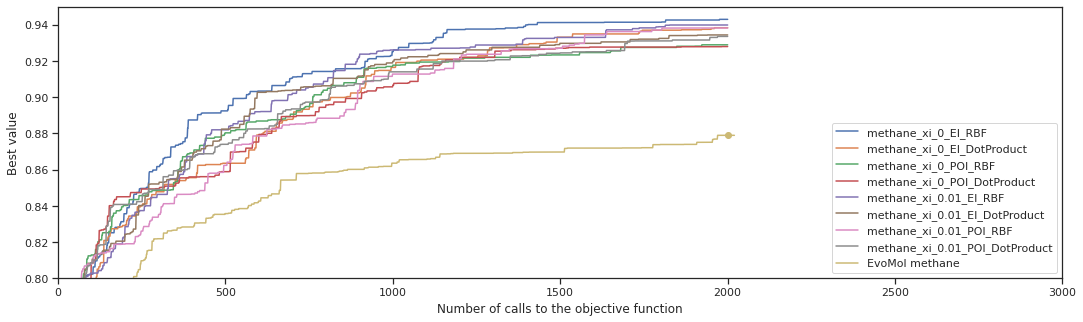

In [8]:
from bbomol.postprocessing.plot import plot_best_so_far
from bbomol.postprocessing import plot
plot.figsize = (18, 5)

curr_exp_names = [exp_name for exp_name in all_exp_names if "methane" in exp_name]

plot_best_so_far(results_dict, metric="mean",
                 exp_list_plot=curr_exp_names,
                 ylim=(0.8, 0.95), xlim=(0, 3000), plot_last_common_data_all_runs=True)

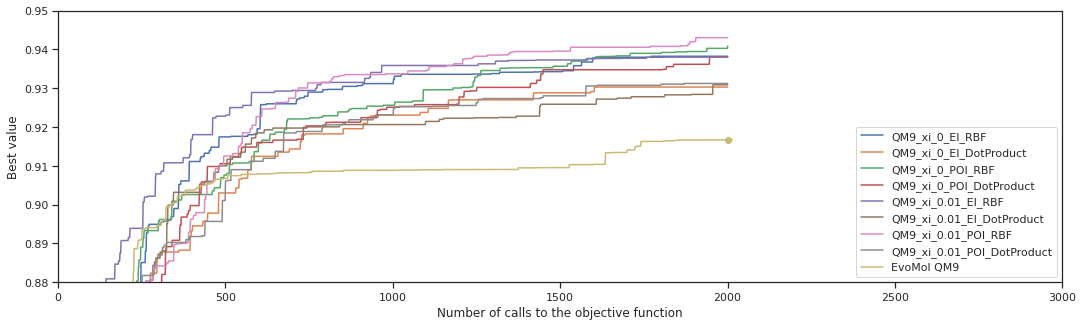

In [9]:
curr_exp_names = [exp_name for exp_name in all_exp_names if "QM9" in exp_name]

plot_best_so_far(results_dict, 
                 exp_list_plot=curr_exp_names,
                 ylim=(0.88, 0.95), xlim=(0, 3000), plot_last_common_data_all_runs=True)

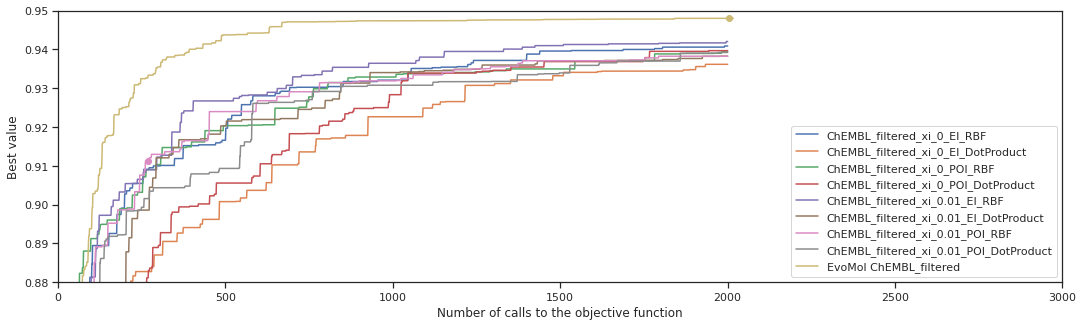

In [10]:
curr_exp_names = [exp_name for exp_name in all_exp_names if "ChEMBL" in exp_name]

plot_best_so_far(results_dict, 
                 exp_list_plot=curr_exp_names,
                 ylim=(0.88, 0.95), xlim=(0, 3000), plot_last_common_data_all_runs=True)

## Merit function

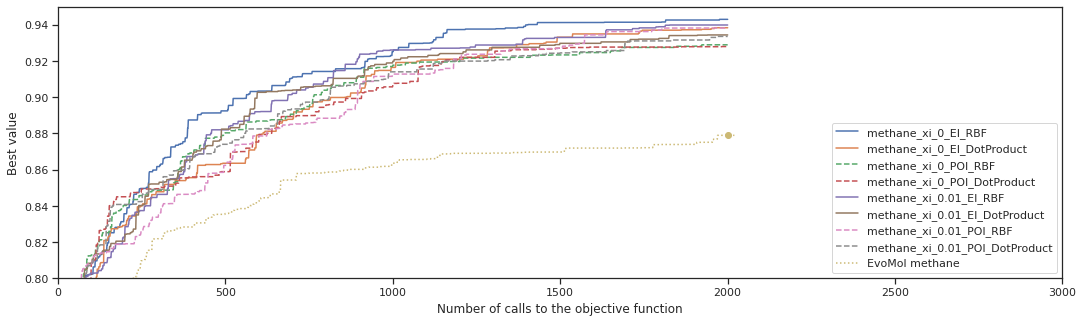

In [11]:
curr_exp_names = [exp_name for exp_name in all_exp_names if "methane" in exp_name]

plot_best_so_far(results_dict, 
                 exp_list_plot=curr_exp_names, 
                 classes_dashes=[0 if "EI" in name else 1 if "POI" in name else 2 for name in curr_exp_names],
                 ylim=(0.8, 0.95), xlim=(0, 3000), plot_last_common_data_all_runs=True)

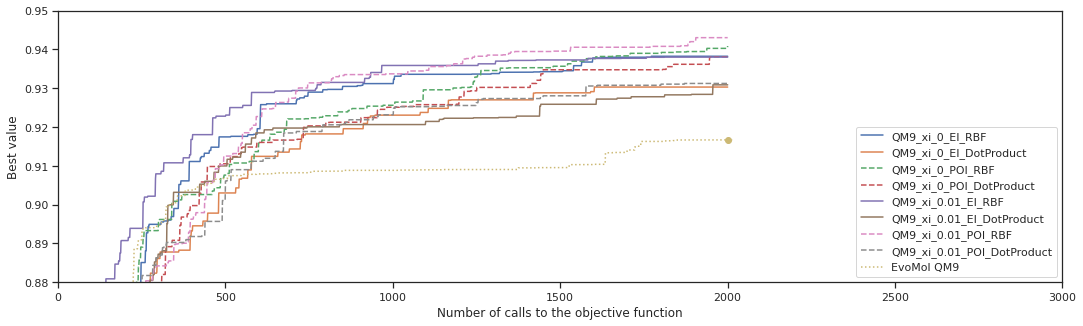

In [12]:
curr_exp_names = [exp_name for exp_name in all_exp_names if "QM9" in exp_name]

plot_best_so_far(results_dict, 
                 exp_list_plot=curr_exp_names, 
                 classes_dashes=[0 if "EI" in name else 1 if "POI" in name else 2 for name in curr_exp_names],
                 ylim=(0.88, 0.95), xlim=(0, 3000), plot_last_common_data_all_runs=True)

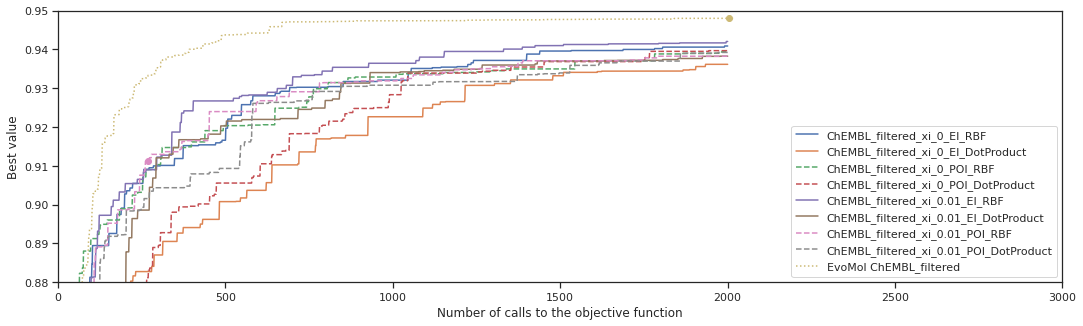

In [13]:
curr_exp_names = [exp_name for exp_name in all_exp_names if "ChEMBL" in exp_name]

plot_best_so_far(results_dict, 
                 exp_list_plot=curr_exp_names, 
                 classes_dashes=[0 if "EI" in name else 1 if "POI" in name else 2 for name in curr_exp_names],
                 ylim=(0.88, 0.95), xlim=(0, 3000), plot_last_common_data_all_runs=True)

## Kernel

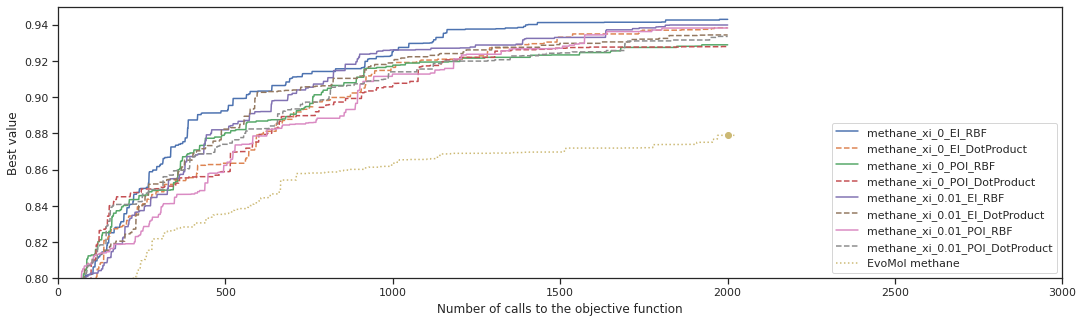

In [14]:
curr_exp_names = [exp_name for exp_name in all_exp_names if "methane" in exp_name]

plot_best_so_far(results_dict, 
                 exp_list_plot=curr_exp_names, 
                 classes_dashes=[0 if "RBF" in name else 1 if "DotProduct" in name else 2 for name in curr_exp_names],
                 ylim=(0.8, 0.95), xlim=(0, 3000), plot_last_common_data_all_runs=True)

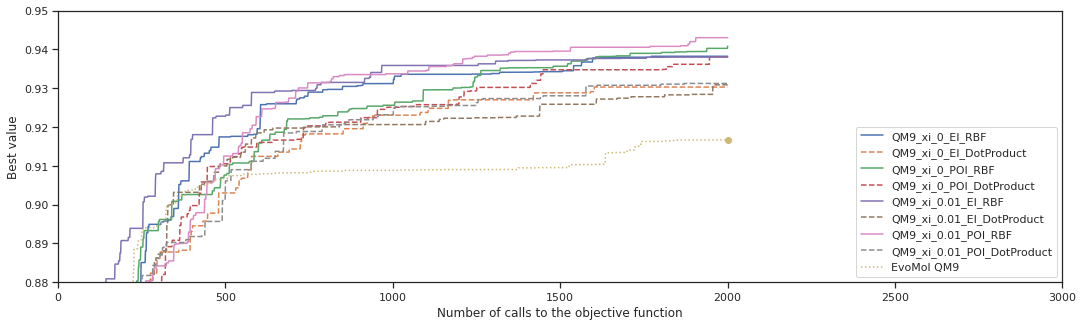

In [15]:
curr_exp_names = [exp_name for exp_name in all_exp_names if "QM9" in exp_name]

plot_best_so_far(results_dict, 
                 exp_list_plot=curr_exp_names, 
                 classes_dashes=[0 if "RBF" in name else 1 if "DotProduct" in name else 2 for name in curr_exp_names],
                 ylim=(0.88, 0.95), xlim=(0, 3000), plot_last_common_data_all_runs=True)

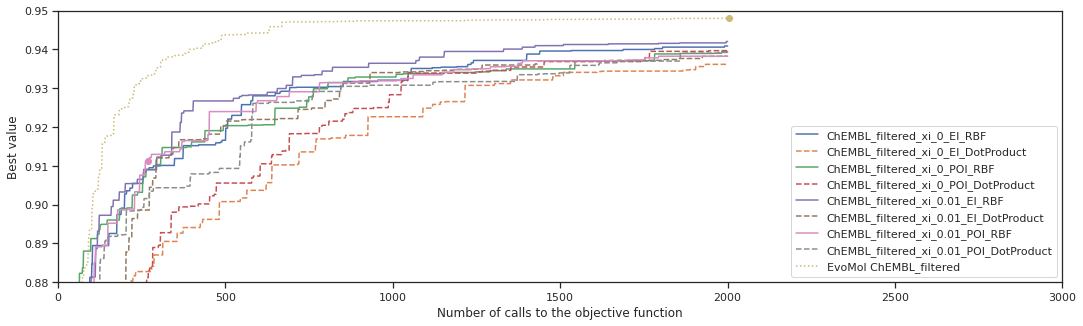

In [16]:
curr_exp_names = [exp_name for exp_name in all_exp_names if "ChEMBL" in exp_name]

plot_best_so_far(results_dict, 
                 exp_list_plot=curr_exp_names, 
                 classes_dashes=[0 if "RBF" in name else 1 if "DotProduct" in name else 2 for name in curr_exp_names],
                 ylim=(0.88, 0.95), xlim=(0, 3000), plot_last_common_data_all_runs=True)

## Xi parameter (exploration)

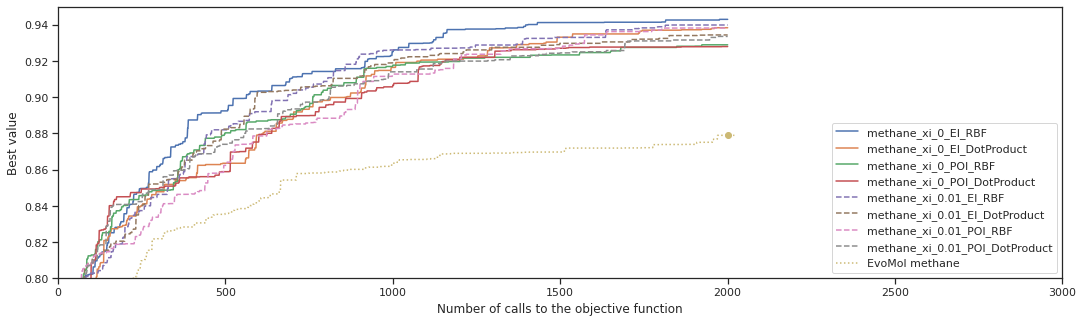

In [17]:
curr_exp_names = [exp_name for exp_name in all_exp_names if "methane" in exp_name]

plot_best_so_far(results_dict, 
                 exp_list_plot=curr_exp_names, 
                 classes_dashes=[0 if "_0_" in name else 1 if "_0.01_" in name else 2 for name in curr_exp_names],
                 ylim=(0.8, 0.95), xlim=(0, 3000), plot_last_common_data_all_runs=True)

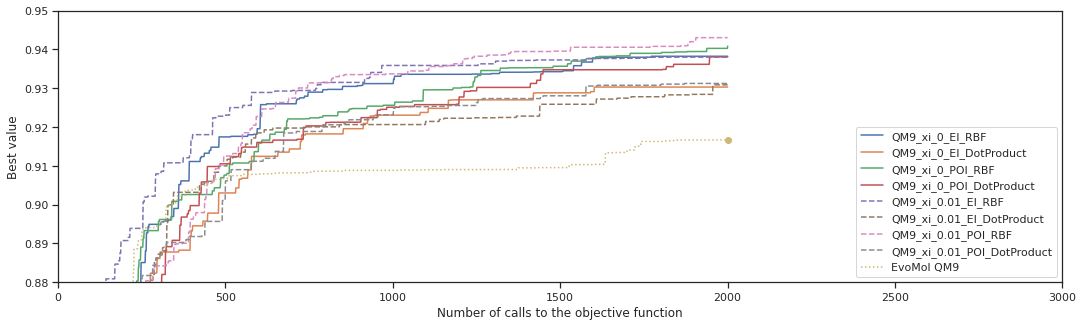

In [18]:
curr_exp_names = [exp_name for exp_name in all_exp_names if "QM9" in exp_name]

plot_best_so_far(results_dict, 
                 exp_list_plot=curr_exp_names, 
                 classes_dashes=[0 if "_0_" in name else 1 if "_0.01_" in name else 2 for name in curr_exp_names],
                 ylim=(0.88, 0.95), xlim=(0, 3000), plot_last_common_data_all_runs=True)

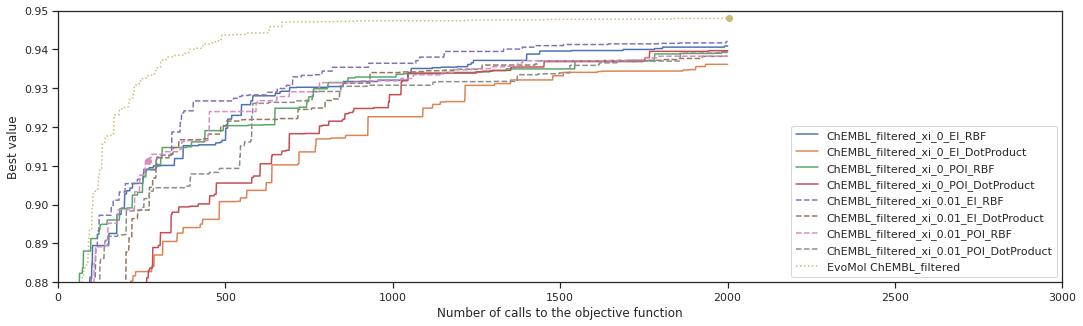

In [19]:
curr_exp_names = [exp_name for exp_name in all_exp_names if "ChEMBL" in exp_name]

plot_best_so_far(results_dict, 
                 exp_list_plot=curr_exp_names, 
                 classes_dashes=[0 if "_0_" in name else 1 if "_0.01_" in name else 2 for name in curr_exp_names],
                 ylim=(0.88, 0.95), xlim=(0, 3000), plot_last_common_data_all_runs=True)